In [1]:
import numpy as np
import librosa
from python_speech_features import mfcc
import matplotlib.pyplot as plt

plt.set_cmap('gist_stern')

<Figure size 432x288 with 0 Axes>

In [3]:
example_file_dir = 'data/bangla/speaker_01/bangla_s01_030.wav'
dataset_fix_length_flatten = 'data_output/8000_fix-length_flatten/bangla/speaker_01/data.npy'
dataset_trim_silence_take_average = 'data_output/8000_trim-silence_take-average/bangla/speaker_01/data.npy'

mfcc_datas = [f'data_output/{i}_trim-silence_take-average/bangla/speaker_01/data.npy' for i in range(3, 24, 2)]

# Presentation Preset Generation

## Preprocessing Methods

In [3]:
audio, sr = librosa.load(example_file_dir, sr=8000)

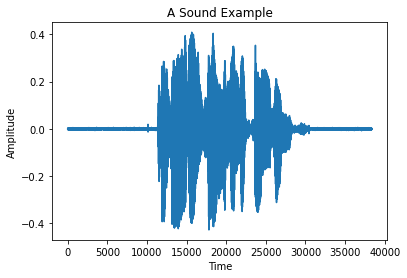

In [4]:
plt.plot(audio)
plt.title('A Sound Example')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.savefig('./output/preprocessing_audio.png')
plt.show()

In [5]:
audio_trimmed, index_trimmed = librosa.effects.trim(audio, top_db=20)

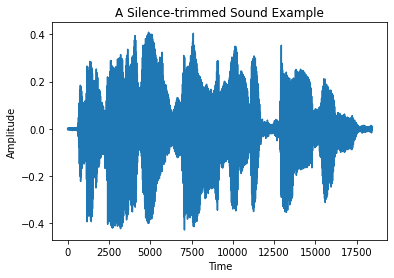

In [6]:
plt.plot(audio_trimmed)
plt.title('A Silence-trimmed Sound Example')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.savefig('./output/preprocessing_audio_trimmed.png')
plt.show()

In [7]:
audio_length_fixed = librosa.util.fix_length(audio, size=sr * 7)

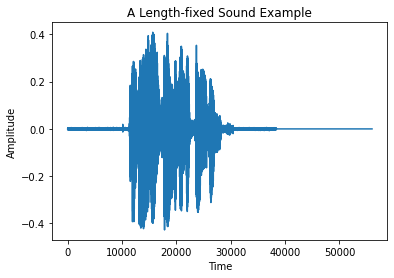

In [8]:
plt.plot(audio_length_fixed)
plt.title('A Length-fixed Sound Example')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.savefig('./output/preprocessing_audio_length_fixed.png')
plt.show()

# Postprocessing Methods

In [9]:
mfcc_data = mfcc(audio, samplerate=sr, numcep=13)

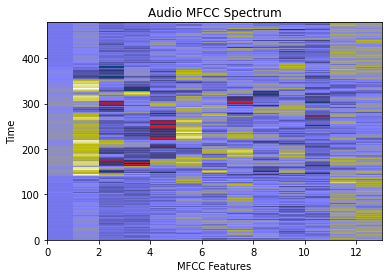

In [10]:
plt.pcolormesh(mfcc_data)
plt.title('Audio MFCC Spectrum')
plt.xlabel('MFCC Features')
plt.ylabel('Time')
plt.savefig('./output/postprocessing_mfcc.png')
plt.show()

In [11]:
mfcc_data_flatten = mfcc_data.flatten()

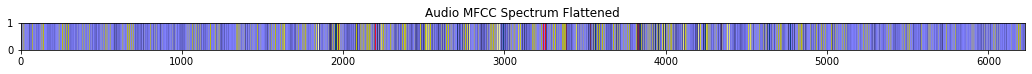

In [12]:
plt.figure(figsize=(18, 0.5))
plt.pcolormesh(mfcc_data_flatten.reshape((1, -1)))
plt.title('Audio MFCC Spectrum Flattened')
plt.savefig('./output/postprocessing_mfcc_flattened.png')
plt.show()

In [13]:
mfcc_data_take_average = np.mean(mfcc_data, axis=0)

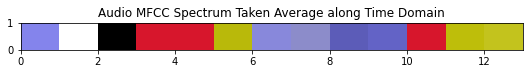

In [14]:
plt.figure(figsize=(9, 0.5))
plt.pcolormesh(mfcc_data_take_average.reshape((1, -1)))
plt.title('Audio MFCC Spectrum Taken Average along Time Domain')
plt.savefig('./output/postprocessing_mfcc_take_average.png')
plt.show()

## Sample Dataset Plot

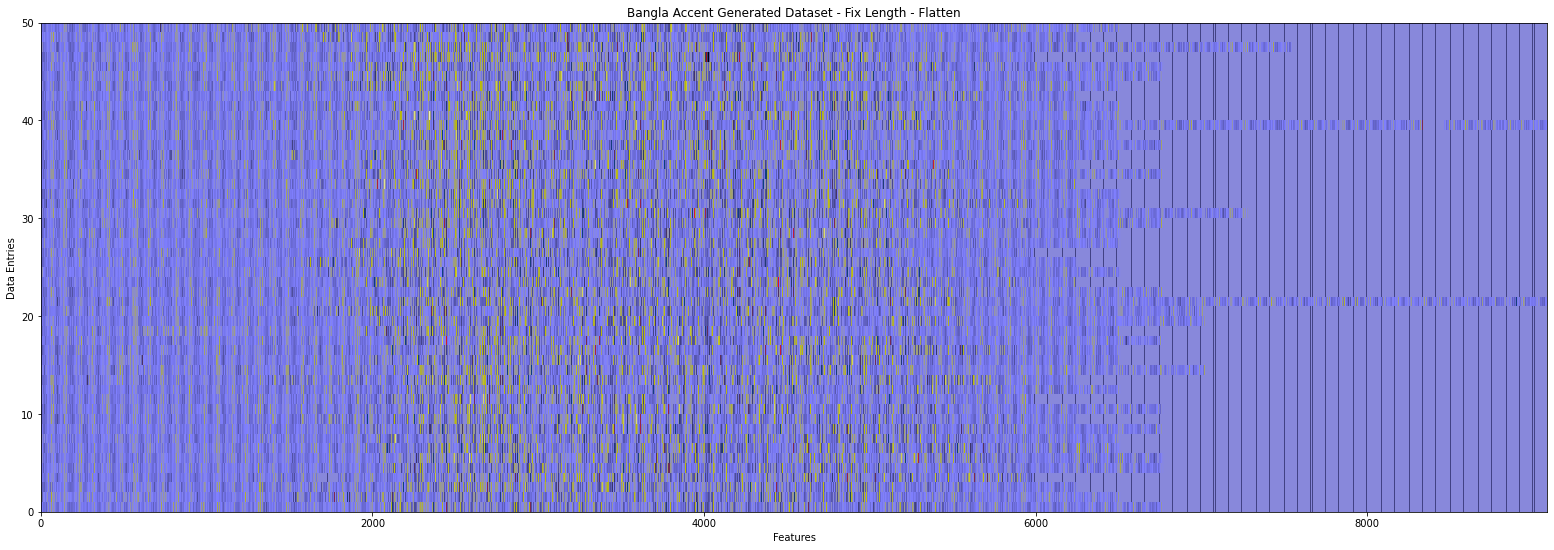

In [15]:
plt.figure(figsize=(27, 9))
plt.pcolormesh(np.load(dataset_fix_length_flatten)[:50, :])
plt.title('Bangla Accent Generated Dataset - Fix Length - Flatten')
plt.xlabel('Features')
plt.ylabel('Data Entries')

plt.savefig('./output/dataset_fix_length_flatten.png')
plt.show()

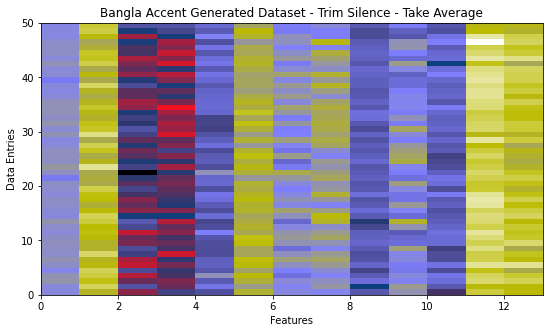

In [16]:
plt.figure(figsize=(9, 5))
plt.pcolormesh(np.load(dataset_trim_silence_take_average)[:50, :])
plt.title('Bangla Accent Generated Dataset - Trim Silence - Take Average')
plt.xlabel('Features')
plt.ylabel('Data Entries')
plt.savefig('./output/dataset_trim_silence_take_average.png')
plt.show()

## MFCC Parameters Check

data_output/3_trim-silence_take-average/bangla/speaker_01/data.npy


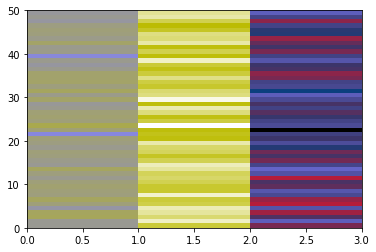

data_output/5_trim-silence_take-average/bangla/speaker_01/data.npy


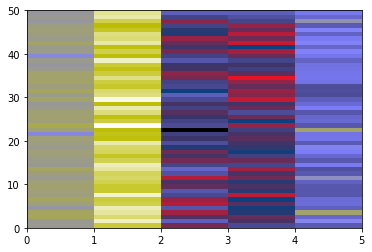

data_output/7_trim-silence_take-average/bangla/speaker_01/data.npy


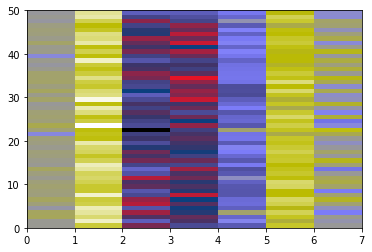

data_output/9_trim-silence_take-average/bangla/speaker_01/data.npy


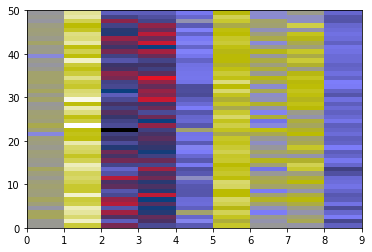

data_output/11_trim-silence_take-average/bangla/speaker_01/data.npy


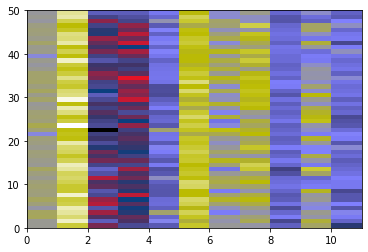

data_output/13_trim-silence_take-average/bangla/speaker_01/data.npy


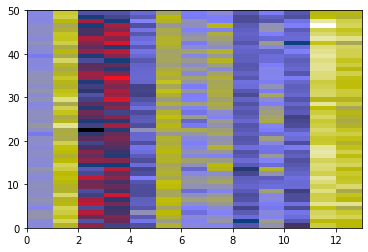

data_output/15_trim-silence_take-average/bangla/speaker_01/data.npy


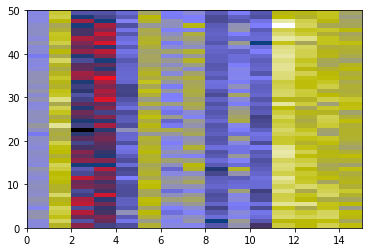

data_output/17_trim-silence_take-average/bangla/speaker_01/data.npy


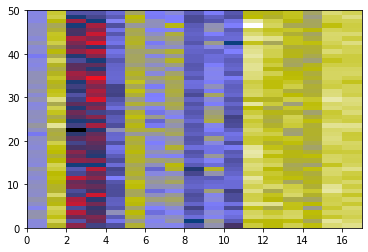

data_output/19_trim-silence_take-average/bangla/speaker_01/data.npy


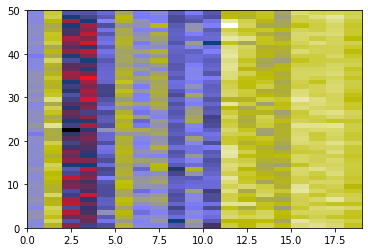

data_output/21_trim-silence_take-average/bangla/speaker_01/data.npy


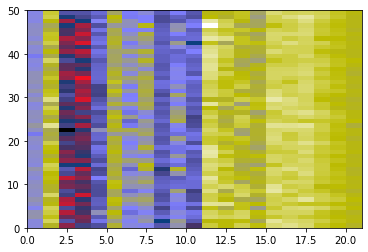

data_output/23_trim-silence_take-average/bangla/speaker_01/data.npy


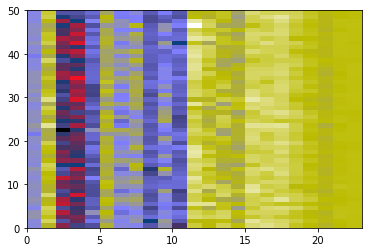

In [7]:
for p in mfcc_datas:
    print(p)
    plt.pcolormesh(np.load(p)[:50, :])
    plt.show()